## Read Data Iris

In [1]:
import pandas as pd

In [2]:
iris_data_path = 'iris/iris_data.csv'
iris_label_path = 'iris/iris_label.csv'

In [3]:
iris_data = pd.read_csv(iris_data_path, header=None, delimiter=';')
iris_labels = pd.read_csv(iris_label_path, header=None, delimiter=';')

In [4]:
iris_labels = iris_labels.iloc[:, 0]

In [5]:
iris_data.head(), iris_labels.head()

(     0    1    2    3   4
 0  5.8  2.8  5.1  2.4 NaN
 1  6.0  2.2  4.0  1.0 NaN
 2  5.5  4.2  1.4  0.2 NaN
 3  7.3  2.9  6.3  1.8 NaN
 4  5.0  3.4  1.5  0.2 NaN,
 0    2
 1    1
 2    0
 3    2
 4    0
 Name: 0, dtype: int64)

## Calculate ε-voisinage (ε-neighborhood).

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def epsilon_neighborhood(p, data, eps):

    distances = np.linalg.norm(data - p, axis=1)

    neighbors_idx = np.where(distances <= eps)[0]
    return neighbors_idx

In [8]:
iris_data_array = iris_data.to_numpy()
iris_labels_array = iris_labels.to_numpy()

In [9]:
iris_data_array = iris_data_array[:, :-1]

In [10]:
p = iris_data_array[0]
eps = 0.5
neighbors_idx = epsilon_neighborhood(p, iris_data_array, eps)

In [11]:
print(neighbors_idx)

[ 0 20]


### Core Point

In [12]:
def is_core_point(p_idx, data, eps, MinPts):
    """
    Check if the point at index p_idx is a core point.
    
    Parameters:
    p_idx (int): Index of the point in the dataset.
    data (numpy.ndarray): The dataset.
    eps (float): The epsilon value for the neighborhood.
    MinPts (int): The minimum number of points to define a core point.
    
    Returns:
    bool: True if the point is a core point, False otherwise.
    """
    neighbors_idx = epsilon_neighborhood(data[p_idx], data, eps)
    return len(neighbors_idx) >= MinPts

In [13]:
MinPts = 5
is_core = is_core_point(0, iris_data_array, eps, MinPts)
print(f"Point at index 0 is a core point: {is_core}")

Point at index 0 is a core point: False


## Cluster

In [14]:
def expand_cluster(core_pt_idx, data, eps, MinPts, cluster_id, clusters, visited):
    """
    Expand the cluster to include all density-reachable points.
    
    Parameters:
    core_pt_idx (int): Index of the core point from which to expand the cluster.
    data (numpy.ndarray): The dataset.
    eps (float): The epsilon value for the neighborhood.
    MinPts (int): The minimum number of points to define a core point.
    cluster_id (int): The cluster ID to assign to the new points in the cluster.
    clusters (numpy.ndarray): The array where cluster IDs are stored.
    visited (numpy.ndarray): The array to keep track of visited points.
    """
    neighbors = epsilon_neighborhood(data[core_pt_idx], data, eps)

    clusters[core_pt_idx] = cluster_id
    for neighbor_idx in neighbors:
        clusters[neighbor_idx] = cluster_id

    i = 0
    while i < len(neighbors):
        neighbor_idx = neighbors[i]
        if not visited[neighbor_idx]:
            visited[neighbor_idx] = True

            neighbor_pt_neighbors = epsilon_neighborhood(data[neighbor_idx], data, eps)

            if len(neighbor_pt_neighbors) >= MinPts:
                neighbors = np.append(neighbors, neighbor_pt_neighbors)

        if clusters[neighbor_idx] == 0:
            clusters[neighbor_idx] = cluster_id
        i += 1

### Example test

In [15]:
core_points_indices = [index for index, pt in enumerate(iris_data_array) if is_core_point(index, iris_data_array, eps, MinPts)]
clusters = np.zeros(len(iris_data_array))
visited = np.zeros(len(iris_data_array), dtype=bool)
cluster_id = 1

In [16]:
for core_pt_idx in core_points_indices:
    if not visited[core_pt_idx]:
        expand_cluster(core_pt_idx, iris_data_array, eps, MinPts, cluster_id, clusters, visited)
        cluster_id += 1

In [17]:
print(clusters)

[2. 2. 1. 2. 1. 2. 1. 2. 2. 2. 0. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1.
 2. 1. 1. 2. 0. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 0. 2. 2.
 2. 0. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2.
 1. 1. 2. 1. 2. 0. 1. 0. 0. 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 0. 2. 1. 2. 2.
 1. 1. 2. 1. 1. 1. 2. 2. 0. 1. 1. 1. 2. 2. 1. 1. 2. 1. 0. 0. 0. 2. 1. 2.
 1. 0. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 0. 1.
 1. 1. 2. 2. 0. 1.]


In [18]:
unique, counts = np.unique(clusters, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 17, 1.0: 49, 2.0: 84}


In [19]:
num_noise = len(clusters[clusters == 0])
print(f"Nombre de points de bruit: {num_noise}")

Nombre de points de bruit: 17


### Plot show

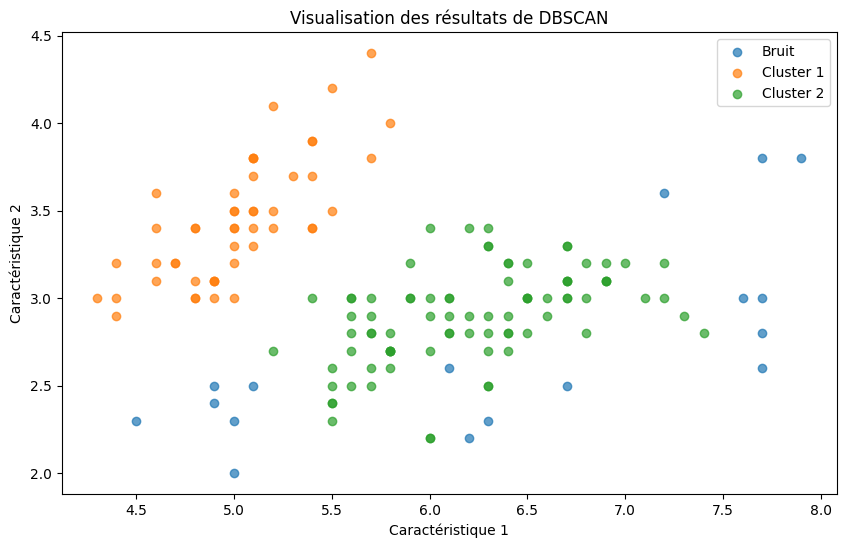

In [20]:
plt.figure(figsize=(10, 6))

for cluster_id in np.unique(clusters):
    if cluster_id == 0:  # Points de bruit
        label = 'Bruit'
    else:
        label = f'Cluster {int(cluster_id)}'
    plt.scatter(iris_data_array[clusters == cluster_id, 0], iris_data_array[clusters == cluster_id, 1], label=label, alpha=0.7)

plt.title("Visualisation des résultats de DBSCAN")
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
plt.legend()
plt.show()

In [21]:
def calculate_sse(clusters, data):
    sse = 0
    for cluster_id in np.unique(clusters):
        if cluster_id == 0:
            continue
        cluster_data = data[clusters == cluster_id]
        centroid = np.mean(cluster_data, axis=0)
        sse += np.sum((cluster_data - centroid) ** 2)
    return sse

In [22]:
def calculate_silhouette(clusters, data):
    silhouette = 0
    for i in range(len(data)):
        cluster_id = int(clusters[i])
        cluster = data[clusters == cluster_id]
        a_i = np.mean(np.linalg.norm(data[i] - cluster, axis=1))
        b_i = np.inf
        for j in np.unique(clusters):
            if j != cluster_id and j != 0:
                cluster_j = data[clusters == j]
                distance = np.mean(np.linalg.norm(data[i] - cluster_j, axis=1))
                b_i = min(b_i, distance)
        if b_i == np.inf:
            b_i = a_i
        silhouette += (b_i - a_i) / max(a_i, b_i)
    return silhouette / len(data)

In [23]:
def calculate_classification_rate(clusters, labels):
	""" Calculate the classification rate """
	nb_correct = 0
	for i in range(len(clusters)):
		if clusters[i] == labels[i]:
			nb_correct += 1
	return nb_correct / len(clusters)

In [24]:
sse = calculate_sse(clusters, iris_data_array)

In [25]:
print(f"SSE: {sse}")

SSE: 90.858537414966


In [26]:
silhouette = calculate_silhouette(clusters, iris_data_array)

In [27]:
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.6307777779581685


In [28]:
classification_rate = calculate_classification_rate(clusters, iris_labels_array)
print(f"Classification rate: {classification_rate}")

Classification rate: 0.2733333333333333
